# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [3]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [6]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [7]:
df.shape

(81937, 15)

In [8]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows = 30000)
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [9]:
# Each row contains information registered for a dog/pet. 
# "Owner Zip Code" is the pet owner zip code in NYC.
# "Animal Name" shows the pet name, and "Animal Gender" whether it is male or female. 
# "Primary Breed" indicates which breed a dog is mainly made up of, or if it is unknown.
# "Secondary Breed" is the the breed a dog might be easily recognizable.
# "Animal Dominant Color", "Animal Secondary Color" and "Animal Third Color" is the color of the dog.
# "Animal Birth" is the date of birth of the dog.
# "Spayed or Neut" is whether the dog is dterilized or not.
# "Guard or Trained" is whether or not the dog is trained.
# "Vaccinated". is whether or not the dog is vaccinated.
# "Application Date" is the date in which the owner submitted an application to register their dog
# "License Issued Date" and "License Expired Date" is the date in which the license was issued 
# and the date in which it expires

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [10]:
# What are the most common names and how does it change by NYC areas?
# Are dogs with unknown "Primary Breed" more common on certain NYC areas? Where 
# are purebreds more common? What are the most popular breeds and how does that change by area?
# Are purebreds more likely to not been vaccinated?
# Are there breeds that are more likely to be trained?
# Unique dog of a certain breed in NYC?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [11]:
df['Primary Breed'].value_counts().head(10)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: Primary Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

In [12]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows = 30000, na_values = "Unknown")
df.shape

(30000, 15)

<AxesSubplot:>

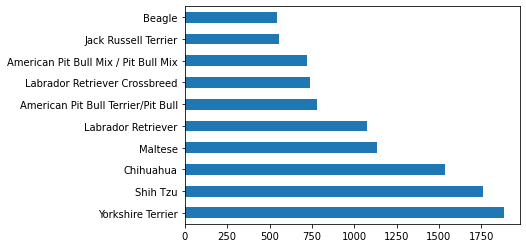

In [13]:
df['Primary Breed'].value_counts().head(10).plot(kind='barh')

## What are the most popular dog names?

In [14]:
df['Animal Name'].value_counts().head(20)

UNKNOWN     203
Max         202
Bella       193
Charlie     172
Lola        146
Rocky       140
Lucy        128
Coco        114
Buddy       113
Lucky       106
Daisy        90
Lily         88
Princess     86
Bailey       83
Luna         81
Molly        81
Toby         79
Oliver       79
Chloe        78
Teddy        76
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [17]:
#df.columns = [c.lower().replace(' ', '_') for c in df.columns]
df[df.animal_name == 'Mimi'].animal_name.count()
# There are a couple of Mimis :)

24

In [18]:
df[df.animal_name == 'Max'].animal_name.count()

202

In [19]:
df[df.animal_name == 'Maxwell'].animal_name.count()

11

## What percentage of dogs are guard dogs?

In [20]:
df.guard_or_trained.value_counts(normalize = True) * 100

No     99.914254
Yes     0.085746
Name: guard_or_trained, dtype: float64

## What are the actual numbers?

In [21]:
df.guard_or_trained.value_counts()

No     19809
Yes       17
Name: guard_or_trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [22]:
df.guard_or_trained.value_counts(dropna = False)

No     19809
NaN    10174
Yes       17
Name: guard_or_trained, dtype: int64

## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [23]:
df.guard_or_trained.fillna('No').value_counts()

No     29983
Yes       17
Name: guard_or_trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [24]:
guard_dogs = df[df.guard_or_trained == 'Yes']
guard_dogs.primary_breed.value_counts().head(5)

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Name: primary_breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [26]:
df['year'] = df['animal_birth'].apply(lambda birth: birth.year)
df.head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [28]:
df['age'] = 2022 - df['year']
df.age.median()

12.0

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [29]:
zip_df = pd.read_csv("zipcodes-neighborhoods.csv")
zip_df

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [30]:
merged = df.merge(zip_df, left_on='owner_zip_code', right_on='zip')
merged.head(3)

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [31]:
merged[merged.borough == 'Bronx'].animal_name.value_counts().head(5)

Bella       22
Max         21
Rocky       20
Princess    15
Lucky       15
Name: animal_name, dtype: int64

In [32]:
merged[merged.borough == 'Brooklyn'].animal_name.value_counts().head(5)

Max        46
unknown    45
UNKNOWN    45
Bella      45
Charlie    42
Name: animal_name, dtype: int64

In [33]:
merged[merged.neighborhood == 'Upper East Side'].animal_name.value_counts().head(5)

Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
Name: animal_name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [34]:
merged.groupby(by = 'neighborhood').primary_breed.value_counts()
# ??

neighborhood  primary_breed              
Borough Park  Yorkshire Terrier              49
              Maltese                        34
              Shih Tzu                       34
              Chihuahua                      32
              Labrador Retriever             19
                                             ..
West Queens   Soft Coated Wheaten Terrier     1
              Tibetan Spaniel                 1
              Toy Fox Terrier                 1
              Weimaraner                      1
              Wire Fox Terrier                1
Name: primary_breed, Length: 3987, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [80]:
merged.query("spayed_or_neut == 'No'").primary_breed.value_counts().head(5)

Yorkshire Terrier                     531
Shih Tzu                              401
Chihuahua                             303
Maltese                               300
American Pit Bull Terrier/Pit Bull    173
Name: primary_breed, dtype: int64

In [77]:
merged.groupby(by='animal_gender').spayed_or_neut.value_counts(sort=True)

animal_gender  spayed_or_neut
               Yes                   3
F              Yes               11620
               No                 1930
M              Yes               12677
               No                 3343
Name: spayed_or_neut, dtype: int64

In [ ]:
# ???

## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [81]:
# 1. Explore the results Animal Dominant Color
merged.animal_dominant_color.value_counts().head()

BLACK    5250
WHITE    4228
Black    2844
White    2376
BROWN    2018
Name: animal_dominant_color, dtype: int64

In [83]:
# 2. Filter
merged[merged.animal_dominant_color.str.contains("black", na=False)]

# 2. Create the column 
# merged['monochrome'] = 


,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,neighborhood,zip,borough


## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

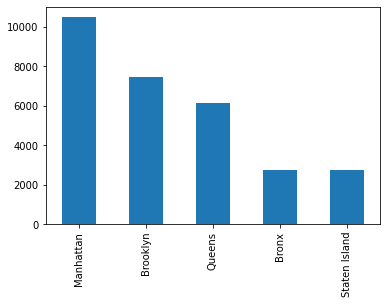

In [62]:
merged.borough.value_counts().plot.bar()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.